In [1]:
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
file_list = ["S01R01", "S01R02", "S02R01", "S02R02", "S03R01", "S05R01", "S05R02", "S06R01", "S07R01", "S08R01", "S09R01"]

In [3]:
def calcAccuracy(Ypred, Ytrue):
    return (np.count_nonzero(Ypred == Ytrue)) / len(Ytrue)

In [4]:
def calcSpecificity(Y_pred,Y_true):
  r = []
  for i in range(len(Y_true)):
    r.append((Y_true[i]==Y_pred[i]) & (Y_true[i] == 1))
  true_neg = r.count(True)  # predizioni 1 che davvero sono 1

  r = []
  for i in range(len(Y_true)):
    r.append((Y_true[i]!=Y_pred[i]) & (Y_pred[i] == 2))
  false_pos = r.count(True)  # predizioni 2 che però sono 1

  return true_neg/(true_neg + false_pos)

In [5]:
def calcSensitivity(Y_pred, Y_true):
  r = []
  for i in range(len(Y_true)):
    r.append((Y_true[i]==Y_pred[i]) & (Y_true[i] == 2))
  true_pos = r.count(True)  # predizioni 2 che davvero sono 2
 
  r = []
  for i in range(len(Y_true)):
    r.append((Y_true[i]!=Y_pred[i]) & (Y_pred[i] == 1))
  false_neg = r.count(True) # predizioni 1 che però sono 2


  return true_pos/(true_pos + false_neg)

S01R01 acc: 0.9435365109011888
S01R02 acc: 0.9450295104733248
S02R01 acc: 0.8682463220934774
S02R02 acc: 0.8729539740366361
S03R01 acc: 0.8238034109664405
S05R01 acc: 0.7426058759948905
S05R02 acc: 0.8006775547352986
S06R01 acc: 0.922590445484701
S07R01 acc: 0.9472455439321151
S08R01 acc: 0.7404301366157175
S09R01 acc: 0.841664172403472


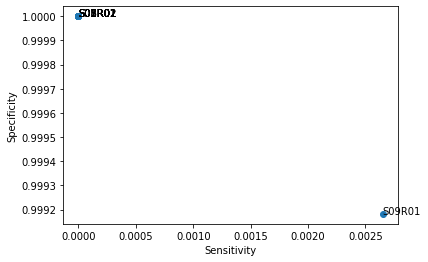

In [ ]:
spec = []
sens = []

for file_name in file_list:
  data = pd.read_csv('gdrive/My Drive/Esame bellotti/dataset/'+file_name+'.txt')
  s = data['N'] != 0
  tmp = data.loc[s]
  tmp.sample(10000)
  X_train, X_test, y_train, y_test = train_test_split(tmp[["A0", "A1", "A2", "U0", "U1", "U2", "T1", "T2", "T3"]], tmp.N, test_size=0.3, random_state = 109) # 70% training and 30% test

  scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
  X_train = scaling.transform(X_train)
  X_test = scaling.transform(X_test)


  clf = svm.SVC(kernel='linear')
  clf = clf.fit(X_train, y_train)

  Y_pred = clf.predict(X_test)

  acc = calcAccuracy(Y_pred, y_test.values)
  sp  = calcSpecificity(Y_pred, y_test.values)
  se = calcSensitivity(Y_pred, y_test.values)
  spec.append(sp)
  sens.append(se)

  print(file_name + " acc: " + str(acc))

fig, ax = plt.subplots()

ax.scatter(sens, spec)
ax.set_xlabel('Sensitivity')
ax.set_ylabel('Specificity')

for i, txt in enumerate(file_list):
  ax.annotate(txt, (sens[i], spec[i]))

